In [2]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from gensim import corpora, models
import pickle
!pip install pyLDAvis
import pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 9.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f3f4aafac44c19b29dcbf633c914473331297a3162a62fa11d70719e8dccc461
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_json("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")

In [4]:
df

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [8]:
with open("/content/drive/MyDrive/data_stem.pkl", 'rb') as f:
    data_stem = pickle.load(f)

In [14]:
print(df.shape[0] == len(data_stem))
df["preprocessed"] = data_stem

True


In [15]:
df_sorted = df[(df.target_names == "soc.religion.christian") | (df.target_names == "rec.sport.hockey") | (df.target_names == "talk.politics.mideast") | (df.target_names == "rec.motorcycles")]

In [16]:
df_sorted

,content,target,target_names,preprocessed
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...
...,...,...,...,...
11298,From: cbetz@radioman.cray.com (Charles Betz {...,10,rec.sport.hockey,nhl team milwauke read report possibl nhl move...
11299,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,17,talk.politics.mideast,turkei cypru bosnia serbia greec armenia azeri...
11300,From: aa888@freenet.carleton.ca (Mark Baker)\n...,15,soc.religion.christian,arrog christian previou articl phsd vaxc monas...
11305,From: shaig@composer.think.com (Shai Guday)\nS...,17,talk.politics.mideast,hezbollah apr yuma acn colost edu repli long l...


In [18]:
vect = TfidfVectorizer(max_df = 0.7, min_df = 0.1)

In [34]:
data_tfidf = vect.fit_transform(df_sorted.preprocessed)
words = vect.get_feature_names_out([data_tfidf])

In [22]:
data_tfidf

<2361x90 sparse matrix of type '<class 'numpy.float64'>'
	with 35606 stored elements in Compressed Sparse Row format>

In [24]:
kmeans = KMeans(n_clusters = 4, max_iter=1000, random_state=0)
kmeans.fit(data_tfidf) #fitting the matrix into 4 clusters; minimizing the distance to a clusters centroid

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [28]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
common_words 
#this returns the last 10 entries of the clusters found
#From SKLearn: Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

array([[24, 71, 54, 34, 18, 89, 88, 49, 75, 77],
       [12,  7, 17,  1, 88, 18, 40,  0, 29, 49],
       [18, 35, 88, 51,  1, 49, 37, 77, 63, 40],
       [28, 10,  4, 51, 18, 75, 37, 60, 64, 85]])

In [37]:
for num, centroid in enumerate(common_words):
 print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : game, team, plai, hockei, edu, year, write, new, think, time
1 : com, bike, dod, articl, write, edu, like, apr, good, new
2 : edu, israel, write, peopl, articl, new, know, time, right, like
3 : god, christian, believ, peopl, edu, think, know, question, rutger, word


In [40]:
df_sorted["cluster"] = kmeans.labels_ #takes the distributed cluster from the kmeans for each row

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


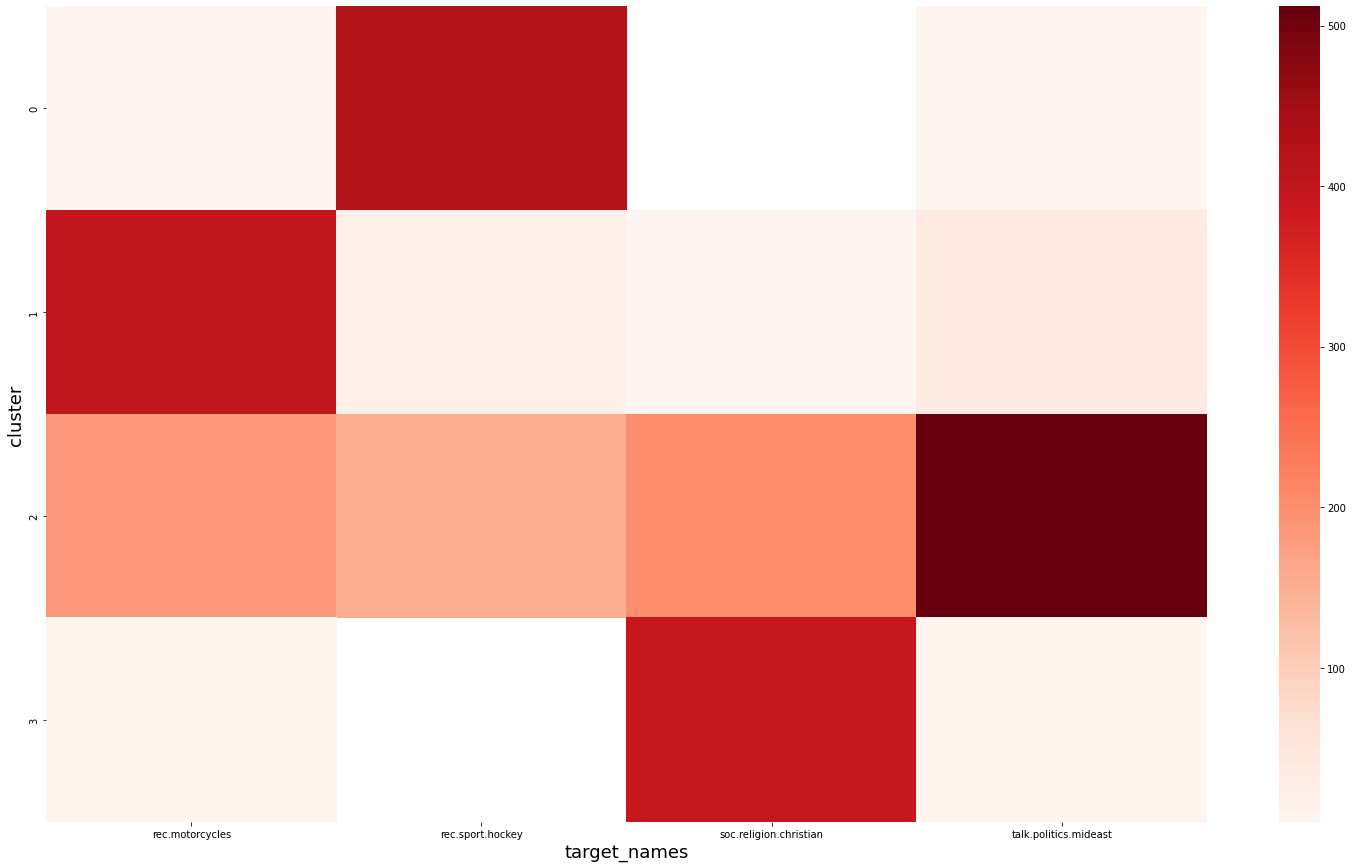

In [44]:
clusters = df_sorted.groupby(['cluster', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
sns.heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('cluster').set_size(18)

In [ ]:
df_sorted.reset_index(inplace = True)

In [57]:
df_sorted["pred"] = 0
for i in df_sorted.index:
  if df_sorted.cluster.iloc[i] == 0: df_sorted["pred"].iloc[i] = 10
  elif df_sorted.cluster.iloc[i] == 1: df_sorted["pred"].iloc[i] = 8
  elif df_sorted.cluster.iloc[i] == 2: df_sorted["pred"].iloc[i] = 17
  elif df_sorted.cluster.iloc[i] == 3: df_sorted["pred"].iloc[i] = 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
df_sorted

,level_0,index,content,target,target_names,preprocessed,cluster,pred
0,0,10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1,8
1,1,21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0,10
2,2,28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,3,15
3,3,33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,2,17
4,4,35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,2,17
...,...,...,...,...,...,...,...,...
2356,2356,11298,From: cbetz@radioman.cray.com (Charles Betz {...,10,rec.sport.hockey,nhl team milwauke read report possibl nhl move...,0,10
2357,2357,11299,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,17,talk.politics.mideast,turkei cypru bosnia serbia greec armenia azeri...,2,17
2358,2358,11300,From: aa888@freenet.carleton.ca (Mark Baker)\n...,15,soc.religion.christian,arrog christian previou articl phsd vaxc monas...,3,15
2359,2359,11305,From: shaig@composer.think.com (Shai Guday)\nS...,17,talk.politics.mideast,hezbollah apr yuma acn colost edu repli long l...,2,17


In [61]:
print(classification_report(df_sorted.target, df_sorted["pred"]))

              precision    recall  f1-score   support

           8       0.87      0.67      0.76       598
          10       0.98      0.71      0.83       600
          15       0.96      0.66      0.78       599
          17       0.49      0.91      0.63       564

    accuracy                           0.73      2361
   macro avg       0.82      0.74      0.75      2361
weighted avg       0.83      0.73      0.75      2361



# Now LDA

In [63]:
list_words = [text.split() for text in df_sorted.preprocessed]
dictionary = corpora.Dictionary(list_words)
dictionary.filter_extremes(no_below=118, no_above=0.95)

In [64]:
corpus = [dictionary.doc2bow(doc) for doc in list_words]

In [65]:
lda = models.LdaModel(corpus, num_topics=4, id2word=dictionary, 
chunksize=10, iterations=100, passes=10, random_state=0)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [66]:
lda.show_topics() #shows phi values for words in a topic (most common words?)
#topic 0: christian
#topic 1: politics mideast
#topic 2: hockey
#topic 3: christian + mideast

[(0,
  '0.041*"edu" + 0.038*"god" + 0.033*"write" + 0.026*"articl" + 0.026*"know" + 0.024*"like" + 0.022*"think" + 0.018*"time" + 0.017*"apr" + 0.014*"thing"'),
 (1,
  '0.040*"armenian" + 0.036*"turkish" + 0.034*"said" + 0.029*"peopl" + 0.028*"kill" + 0.024*"left" + 0.023*"let" + 0.022*"power" + 0.022*"year" + 0.022*"live"'),
 (2,
  '0.057*"com" + 0.056*"team" + 0.040*"game" + 0.038*"hockei" + 0.028*"plai" + 0.026*"year" + 0.026*"edu" + 0.022*"new" + 0.022*"win" + 0.022*"wing"'),
 (3,
  '0.033*"christian" + 0.032*"believ" + 0.032*"israel" + 0.024*"peopl" + 0.023*"isra" + 0.021*"evid" + 0.020*"state" + 0.019*"come" + 0.019*"question" + 0.018*"reason"')]

In [67]:
topics=lda[corpus]
df_sorted['topics_lda']= [max(topics[i],key=lambda item:item[1])[0] for i in range(len(topics))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
df_sorted

,level_0,index,content,target,target_names,preprocessed,cluster,pred,topics_lda
0,0,10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1,8,0
1,1,21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0,10,0
2,2,28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,3,15,0
3,3,33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,2,17,3
4,4,35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,2,17,2
...,...,...,...,...,...,...,...,...,...
2356,2356,11298,From: cbetz@radioman.cray.com (Charles Betz {...,10,rec.sport.hockey,nhl team milwauke read report possibl nhl move...,0,10,2
2357,2357,11299,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,17,talk.politics.mideast,turkei cypru bosnia serbia greec armenia azeri...,2,17,0
2358,2358,11300,From: aa888@freenet.carleton.ca (Mark Baker)\n...,15,soc.religion.christian,arrog christian previou articl phsd vaxc monas...,3,15,3
2359,2359,11305,From: shaig@composer.think.com (Shai Guday)\nS...,17,talk.politics.mideast,hezbollah apr yuma acn colost edu repli long l...,2,17,3


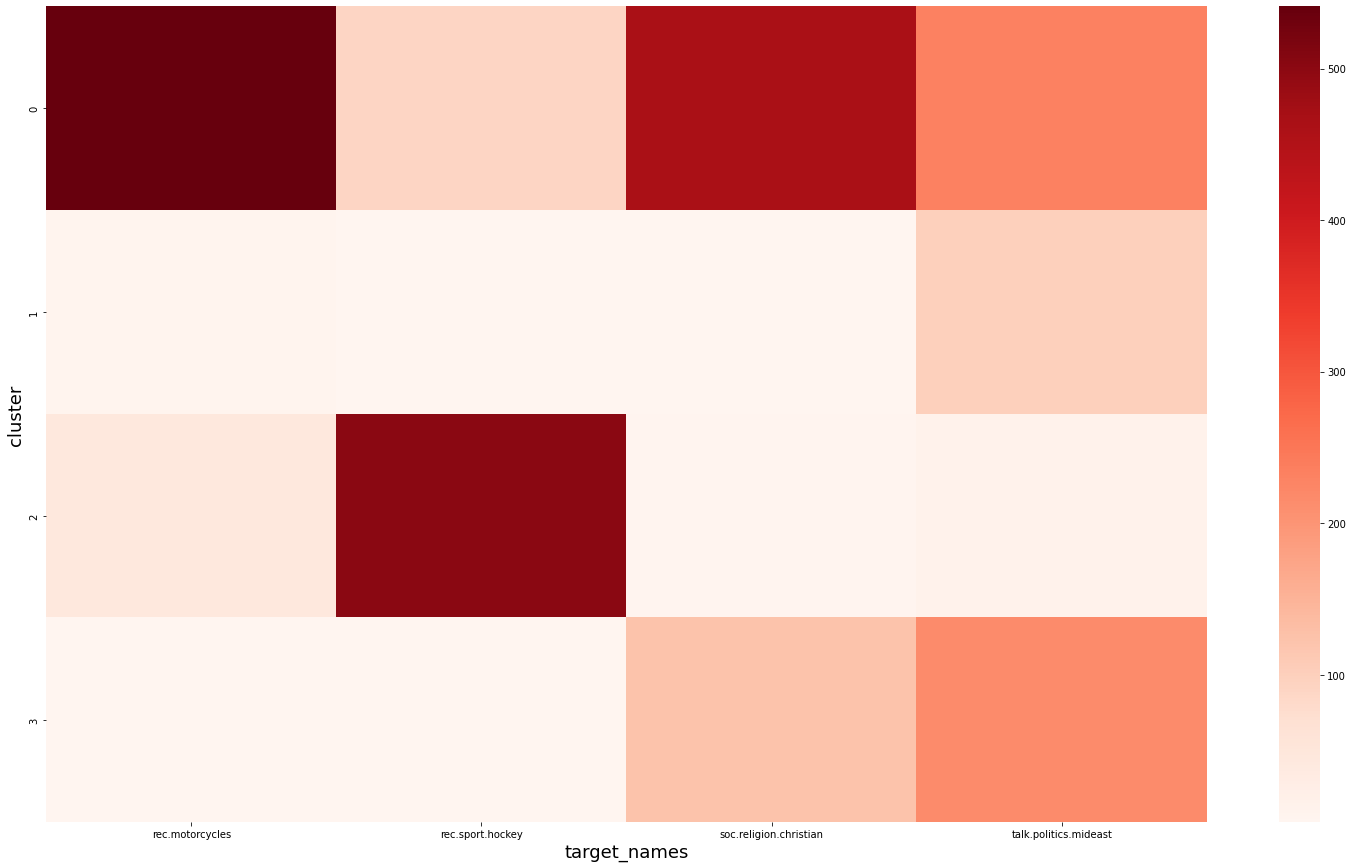

In [69]:
clusters = df_sorted.groupby(['topics_lda', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
sns.heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('cluster').set_size(18)
#we get a lot of 0

In [70]:
df_sorted["pred_lda"] = 0
for i in df_sorted.index:
  if df_sorted.topics_lda.iloc[i] == 0: df_sorted["pred_lda"].iloc[i] = 8
  elif df_sorted.topics_lda.iloc[i] == 1: df_sorted["pred_lda"].iloc[i] = 17
  elif df_sorted.topics_lda.iloc[i] == 2: df_sorted["pred_lda"].iloc[i] = 10
  elif df_sorted.topics_lda.iloc[i] == 3: df_sorted["pred_lda"].iloc[i] = 17
  #hmm, 17 is twice, that kind of sucks! (but expected)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [71]:
print(classification_report(df_sorted.target, df_sorted["pred_lda"]))

              precision    recall  f1-score   support

           8       0.41      0.90      0.56       598
          10       0.88      0.84      0.86       600
          15       0.00      0.00      0.00       599
          17       0.69      0.56      0.62       564

    accuracy                           0.58      2361
   macro avg       0.49      0.58      0.51      2361
weighted avg       0.49      0.58      0.51      2361



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from pyLDAvis.gensim_models import prepare
pyLDAvis.enable_notebook()
LDAvis_prepared = prepare(lda, corpus, dictionary)
LDAvis_prepared
#the topics scoring high on PC1 seem to be about mideast; although topic 2 seems way more christian, compared to topic 4
#topic1 seems very christian
#motorcycles is not really represented in topic 1 apart from "bike"

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.258241  0.068484       1        1  41.550257
3      0.217996 -0.243781       2        1  24.995522
2     -0.175054 -0.084762       3        1  17.733649
1      0.215300  0.260059       4        1  15.720572, topic_info=       Term         Freq        Total Category  logprob  loglift
130     com  1291.000000  1291.000000  Default  30.0000  30.0000
28     team  1266.000000  1266.000000  Default  29.0000  29.0000
42      god  2032.000000  2032.000000  Default  28.0000  28.0000
198    game   904.000000   904.000000  Default  27.0000  27.0000
314  hockei   862.000000   862.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
53    peopl   582.725877  2038.469816   Topic4  -3.5354   0.5980
140   right   399.947093   966.466729   Topic4  -3.9118   0.9679
115    year   442.715185  1257.028119   Topic4  -3.8102   0.8066
197     wai   383.855682  1077.891804   Topic4  -3.9528   0.8177
126    work   282.747459   689.070808   Topic4  -4.2586   0.9594

[206 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
32        1  0.997121  accept
68        2  0.994919     act
157       2  0.997589  answer
12        1  0.856893     apr
12        3  0.142816     apr
...     ...       ...     ...
31        3  0.150654   write
305       1  0.998004   wrong
115       1  0.178198    year
115       3  0.469361    year
115       4  0.352419    year

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])